## C LOARKS matrix 
###### Author: Zimu Huo
###### Date: 07.2022


-------------------------------------------------------------------------
References
    
    [1] 
    Author: Justin P. Haldar 
    Title: Low-Rank Modeling of Local -Space Neighborhoods (LORAKS) for Constrained MRI
    Link: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=6678771

In [3]:
import sys
sys.path.insert(1, '../')
sys.path.insert(1, '../../')
import numpy as np
import matplotlib.pyplot as plt
from util.coil import *
from util.fft import *
from util.phantom import * 
from util.rank import *
import util.mask as undersample
from util.SPARSE import *

In [4]:
data = np.load("../../lib/single_slice.npy")
data = fft2c(rsos(ifft2c(data)))
[ny, nx] = data.shape
print(data.shape)

(256, 256)


0.7388763427734375


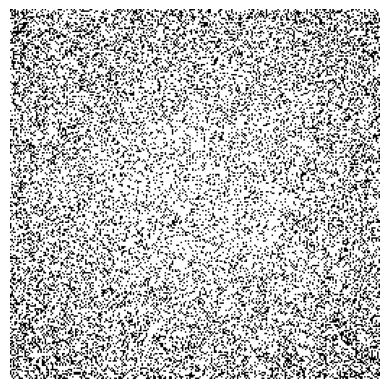

In [5]:
mask = var_dens_mask([ny, nx], 0.00001)
print(undersampling_rate(mask))
show(mask)

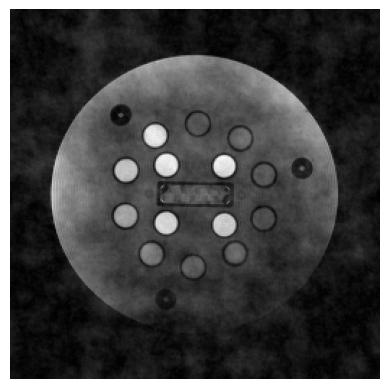

In [6]:
# mask = np.tile(mask.reshape(ny,nx), (1,1))
dataR = data * mask
show(ifft2c(dataR))

rank:224


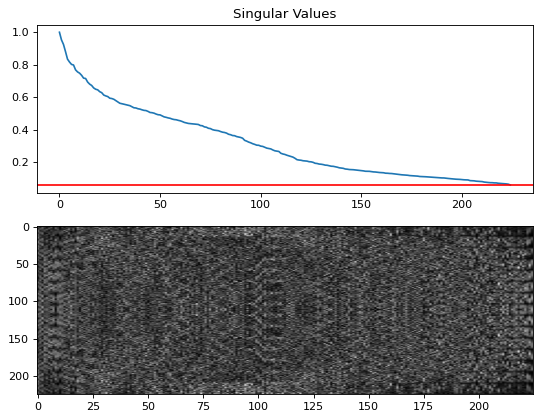

In [7]:
inspect_rank(LOARKS_C(dataR, 15))

In [9]:
import numpy.matlib
from scipy.linalg import block_diag
res = np.copy(dataR)
[ny, nx] = dataR.shape
rank = 200
k = 15

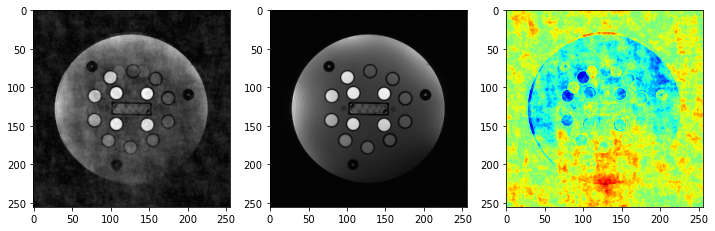

16.255920221724544


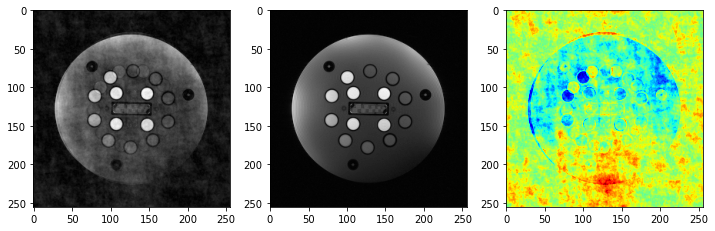

14.556444598086294


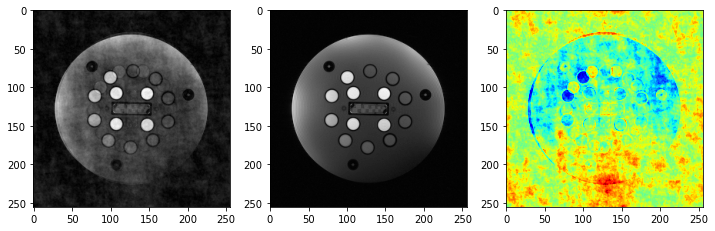

14.13114191772269


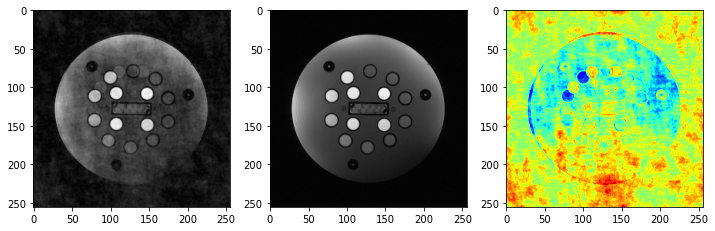

13.853332036529926


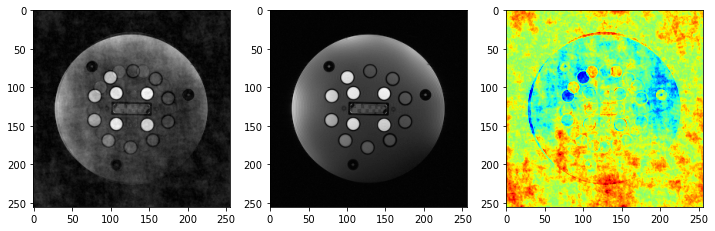

13.971263081713534


In [10]:
log = []
for i in range(50):
    C = LOARKS_C(res, k)
    Cr = rank_approx(C, rank)
    Kc = LOARKS_Cinv(Cr, k, data.shape)
    res = dataR + np.abs(1-mask) * Kc
    if i > 0:
        log.append(linalg.norm(res)-linalg.norm(prev))
    prev = res
    
    if (i % 10)==0: 
        plt.figure(figsize = (12, 8))
        plt.subplot(131)
        plt.imshow(np.abs((ifft2c(res))), cmap ="gray")
        plt.subplot(132)
        plt.imshow(np.abs((ifft2c(data))), cmap ="gray")
        plt.subplot(133)
        plt.imshow(np.abs((ifft2c(res)))-np.abs((ifft2c(data))), cmap ="jet")
        plt.show()
        print(np.sum((np.abs((ifft2c(res)))-np.abs((ifft2c(data))))**2))